In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("IIM_Ranchi_Dataset_Application.csv")
data = data.drop(["Application", "File_Size", "Purchase_Price","App_Version", "Android_Supported", "Latest Updates"], axis = 1)

In [3]:
data.head()

,Ratings,Reviews,Downloads,Category,Content Rating,Genres
0,4.1,159,"10,000+",Free,Everyone,Art & Design
1,3.9,967,"500,000+",Free,Everyone,Art & Design;Pretend Play
2,4.7,87510,"5,000,000+",Free,Everyone,Art & Design
3,4.5,215644,"50,000,000+",Free,Teen,Art & Design
4,4.3,967,"100,000+",Free,Everyone,Art & Design;Creativity


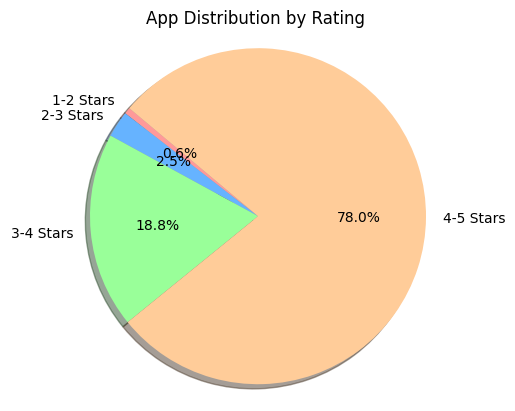

In [70]:
# Define the bin edges
bins = [1, 2, 3, 4, 5]  

# Define the labels for the ranges
labels = ['1-2 Stars', '2-3 Stars', '3-4 Stars', '4-5 Stars']  

# Creating a new column 'Rating Range'
data['Rating Range'] = pd.cut(data['Ratings'], bins=bins, labels=labels, include_lowest=True, right=False)

# Counting the number of ratings in each range
range_counts = data['Rating Range'].value_counts().sort_index()

# Plotting the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']   # showing Colors
plt.pie(range_counts, labels=range_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('App Distribution by Rating ')
plt.axis('equal')
plt.show()

In [46]:
category = data['Category'].value_counts()
print(category)

Category
Free    10040
Paid      800
Name: count, dtype: int64


In [45]:
data['Category'] = np.where(
    data['Category'] == '0', 'Free', data['Category']
)

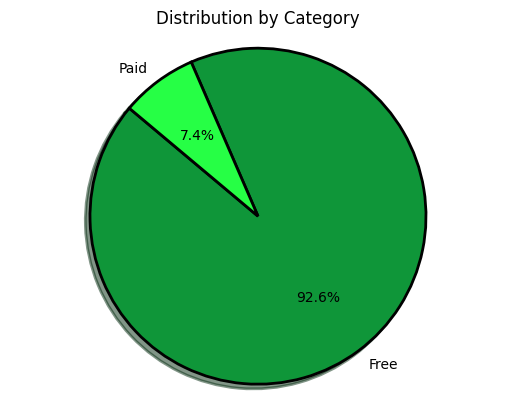

In [71]:
labels = ['Free', 'Paid']
category = data['Category'].value_counts()
colors = ['#0f9639', '#26ff45']
# Plotting the pie chart
plt.pie(category, labels=category.index, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True, wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 2, 
                      'antialiased': True})
plt.title('Distribution by Category')
plt.axis('equal') # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

In [50]:
unique = data['Content Rating'].unique()
print(unique)

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]


In [61]:
data['Content Rating'] = np.where(
    pd.isna(data['Content Rating']) | data['Content Rating'] == 'Unrated', 'Unrated', data['Content Rating']
)

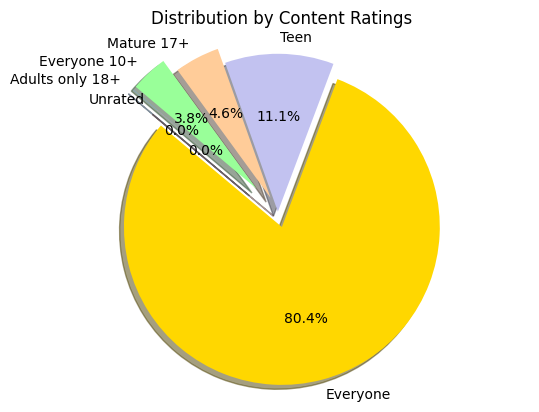

In [84]:
content = data['Content Rating'].value_counts()
explode = (0.1, 0, 0.1, 0.2,0.2, 0)  
colors = ['#FFD700', '#C2C2F0', '#FFCC99', '#99FF99', '#66B3FF', '#FF9999']
# Plotting the pie chart
plt.pie(content, labels=content.index, colors=colors, explode = explode, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribution by Content Ratings')
plt.axis('equal') # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/var/folders/zc/r0mm_4tn4sn3grg8djpslz8c0000gn/T/ipykernel_4042/2846426174.py:1: SyntaxWarning: invalid escape sequence '\+'
  data['Downloads'] = data['Downloads'].replace({'\+': '', ',': '','Free':0}, regex=True).astype(int)


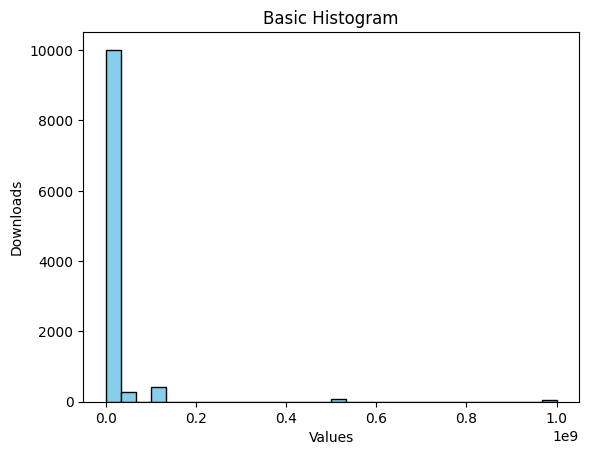

In [91]:
data['Downloads'] = data['Downloads'].replace({'\+': '', ',': '','Free':0}, regex=True).astype(int)
values = data['Downloads'].unique()
# Plotting a basic histogram
plt.hist(data['Downloads'], bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Downloads')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()